# **MIE1513: Final Project**
### Submission date: April 20, 2020 at 23:59pm

-------------

## Academic Integrity Declaration:
In submitting this assessment, I confirm that my conduct during this project adheres to the Code of Behaviour on Academic Matters. I confirm that I have not acted in such a way that would constitute cheating, misrepresentation, or unfairness, including but not limited to, using unauthorized aids and assistance, impersonating another person, and committing plagiarism. I pledge upon my honour that I have not violated the Faculty of Applied Science & Engineering’s Honour Code during this assessment.

-------------


## Part 1: Data Loading

### (a) Load the provided dataset (reddit_data.json)

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Counter
from collections import Counter
#Progress bar
from tqdm import tqdm
#Operation
import operator

import nltk
## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
data_all = pd.read_json("reddit_data.zip", orient='records', lines=True)
data_all = data_all[["id", "author", "created_utc", "subreddit", "title", "num_comments", "score", "selftext", "url"]]

In [3]:
data_all.head()

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
0,abcupx,WithGravy,1546300839,gaming,What are some game games to enjoy on a low-end...,31,3,Got a new laptop and want to enjoy some games ...,https://www.reddit.com/r/gaming/comments/abcup...
1,abcuz2,mikebeingfrank,1546300881,pics,"In 1964, an average wage worker had to clock 8...",4,5,,https://i.redd.it/j6rqqthwcp721.jpg
2,abcv1a,[deleted],1546300892,worldnews,"India: Chinese woman, 25, on solo trip to Khaj...",13,23,,https://timesofindia.indiatimes.com/city/agra/...
3,abcv5v,Lucious-Lyon,1546300914,AskReddit,[Serious] American Liberals of Reddit: Without...,76,0,[removed],https://www.reddit.com/r/AskReddit/comments/ab...
4,abcv7f,sandollars,1546300923,worldnews,"According to the Fiji Government, the Australi...",21,13,,http://fijisun.com.fj/2019/01/01/vuniwaqa-prak...


### (b)	Generate your unique subset of the data

**Make sure you update unique_string with your email address**

In [0]:
# DO NOT CHANGE THE FUNCTION BELOW
def getMySubreddits(data, my_str):
    assert my_str != "", "You must fill in your unique string"
    import random
    subreddits = sorted(data["subreddit"].unique().tolist())
    rng = random.Random(my_str)
    return rng.sample(subreddits, 4)

In [5]:
# Fill in your UofT email in the variable unique_string below
unique_string = "shiyuan.lin@mail.utoronto.ca" 
my_subreddits = getMySubreddits(data_all, unique_string)
print("My subreddits:", my_subreddits)

My subreddits: ['news', 'pics', 'WTF', 'gaming']


In [0]:
data = data_all[data_all["subreddit"].isin(my_subreddits)]

In [7]:
data.head()

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
0,abcupx,WithGravy,1546300839,gaming,What are some game games to enjoy on a low-end...,31,3,Got a new laptop and want to enjoy some games ...,https://www.reddit.com/r/gaming/comments/abcup...
1,abcuz2,mikebeingfrank,1546300881,pics,"In 1964, an average wage worker had to clock 8...",4,5,,https://i.redd.it/j6rqqthwcp721.jpg
5,abcv7e,RyanGwood12,1546300923,pics,Here’s a reminder to grab one of these for a b...,12,0,,https://i.redd.it/063lwxm0dp721.jpg
6,abcv8x,suen05csus,1546300931,gaming,Xbox 1 s controller not discovered via bluetoo...,7,3,Title says it all...\n\nXbox 1 s controller no...,https://www.reddit.com/r/gaming/comments/abcv8...
8,abcvdf,IAmNightbreed,1546300952,gaming,The local Walmart did not sell even one copy o...,24,43,,https://i.redd.it/30cad4s3dp721.jpg


## Part 2: Exploratory Data Analysis 

###(a)

In [8]:
'''
Total rows of data
'''
len(data)

35611

#### 1. Column: author

When I explore the author column, I find out that some author and their selftext been deleted, which has a great chance to affect my classification result if selftext is an import factor in classification task.

I look into the top 20 most activate authors subreddits and find that all of them only has one subreddit except for the authors "[deleted]" and "Glumbot_2". The result indicates that author values can be a very import feature in the classification process.

In [9]:
'''
Get number of authors in the data
'''
data['author'].nunique()

21335

In [10]:
'''
Get how many times for each authors showed in the data
'''
data.author.value_counts().head(20)

[deleted]               7490
hornedviper9             127
Kleinero                 124
tha_amit_maurya          120
ApEcet                   108
Emmanuelsblog             89
randyjm                   68
Gistmania                 67
TheSuperSagor             55
acadvisory                45
14K4051106                42
ContentHow1               31
trendnewswebb             30
malangtimes               29
Glumbot_2                 27
Extra-High-Elf            26
chasingtheunicorn         26
reviewonlineproducts      26
mariyaclijsters           25
chahley1                  25
Name: author, dtype: int64

In [11]:
'''
Get deleted rows
'''
data[data['author']=="[deleted]"]

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
14,abcvv8,[deleted],1546301042,pics,Have a happy 2019 you sexy people!,3,46,[deleted],https://i.redd.it/kphnhymddp721.jpg
62,abcztm,[deleted],1546301712,WTF,PSA - Sodie Pop Addiction,16,6,[deleted],https://imgur.com/qo8VGhH
72,abd0cx,[deleted],1546301802,gaming,Zombie games?,25,2,[deleted],https://www.reddit.com/r/gaming/comments/abd0c...
153,abd66g,[deleted],1546302890,news,Elizabeth Warren is running – here are 10 othe...,0,1,[deleted],https://www.theguardian.com/us-news/2018/dec/3...
167,abd6uv,[deleted],1546303025,news,U.S. Navy pursuing block buy of two aircraft c...,0,0,[deleted],https://www.reuters.com/article/us-usa-defense...
...,...,...,...,...,...,...,...,...,...
226082,alvj6r,[deleted],1548976212,WTF,I have no idea..,9,3,[deleted],https://i.imgur.com/Pw09RDE.jpg?1
226089,alvjuh,[deleted],1548976319,gaming,Nintendo announces 'Dr. Mario' mobile game com...,5,11,[deleted],https://i.redd.it/og4874nccud21.jpg
226120,alvlzm,[deleted],1548976660,gaming,Just finished pencil drawing sketch de_cache :...,7,94,[deleted],https://i.redd.it/qxgrjn3ddud21.jpg
226151,alvo6b,[deleted],1548977303,pics,Emma Stone as a blonde,4,44,[deleted],https://i.imgur.com/LfGFTnf.jpg


In [12]:
'''
Show top 20 most activate authors and their subreddits
'''
for name in data.author.value_counts().head(20).index.tolist():
  print(name + "   " + data[data['author'] == name]['subreddit'].drop_duplicates())
  print("-------------")

14       [deleted]   pics
62        [deleted]   WTF
72     [deleted]   gaming
153      [deleted]   news
Name: subreddit, dtype: object
-------------
300    hornedviper9   news
Name: subreddit, dtype: object
-------------
1745    Kleinero   news
Name: subreddit, dtype: object
-------------
138698    tha_amit_maurya   news
Name: subreddit, dtype: object
-------------
8249    ApEcet   news
Name: subreddit, dtype: object
-------------
2042    Emmanuelsblog   news
Name: subreddit, dtype: object
-------------
4412    randyjm   news
Name: subreddit, dtype: object
-------------
79569    Gistmania   news
Name: subreddit, dtype: object
-------------
2221    TheSuperSagor   news
Name: subreddit, dtype: object
-------------
50    acadvisory   news
Name: subreddit, dtype: object
-------------
5878    14K4051106   news
Name: subreddit, dtype: object
-------------
777    ContentHow1   news
Name: subreddit, dtype: object
-------------
1355    trendnewswebb   news
Name: subreddit, dtype: object
-------

#### 2. Column: num_comments

In the histgram distribution diagram for the num_comments, most values are under 1000.
In the boxplot for the num_comments distribution, there are 2 outliers at the top of the diagram. The values for 2 outliers are around 13800 and 11800.

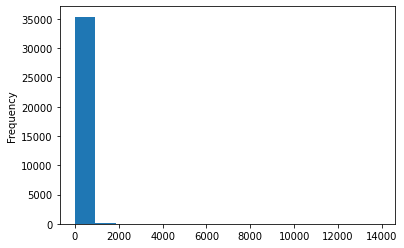

In [13]:
data['num_comments'].plot.hist(bins=15)

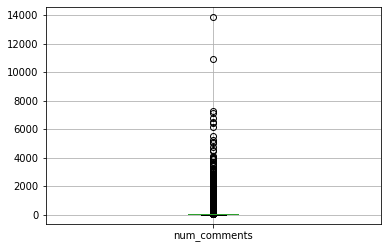

In [14]:
data.boxplot(column=['num_comments'])

#### 3. Column: URL

Number of records belong to the subreddit pics is 5897 and 5310 record urls in this subbreddit contains the string - ".jpg".
Number of records belong to the subreddit news is 4775 and no record url in this subbreddit contains the string - ".jpg".
Number of records belong to the subreddit WTF is 4939 and 2030 record urls in this subbreddit contains the string - ".jpg".
Number of records belong to the subreddit gaming is 20000 and 7158 record urls in this subbreddit contains the string - ".jpg".

Although the result shows that for the subreddit pics, the probability of url containing ".jpg" is really high (90%), there are 7158 record urls in subreddit gaming containg ".jpg". So the large quantity for subreddit gaming may affect the classification result.

In this case, url is not a good indicator for the classification task in terms of the possibility and quantity represented by the url.


In [15]:
'''
Subreddit pics urls
'''
data[data['subreddit']=="pics"]['url']

1         https://i.redd.it/j6rqqthwcp721.jpg
5         https://i.redd.it/063lwxm0dp721.jpg
13        https://i.redd.it/nkcs1p8adp721.jpg
14        https://i.redd.it/kphnhymddp721.jpg
20        https://i.redd.it/jzyd4nhodp721.jpg
                         ...                 
226115    https://i.redd.it/aga2yqk6dud21.jpg
226127    https://i.redd.it/t3svo9sjdud21.jpg
226151        https://i.imgur.com/LfGFTnf.jpg
226169    https://i.redd.it/bu1api8kgud21.jpg
226174    https://i.redd.it/et3gm8ntgud21.jpg
Name: url, Length: 5897, dtype: object

In [16]:
'''
Subreddit pics urls containing ".jpg"
'''
data[data['subreddit']=="pics"][data.url.str.contains(".jpg")]['url']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


1         https://i.redd.it/j6rqqthwcp721.jpg
5         https://i.redd.it/063lwxm0dp721.jpg
13        https://i.redd.it/nkcs1p8adp721.jpg
14        https://i.redd.it/kphnhymddp721.jpg
20        https://i.redd.it/jzyd4nhodp721.jpg
                         ...                 
226115    https://i.redd.it/aga2yqk6dud21.jpg
226127    https://i.redd.it/t3svo9sjdud21.jpg
226151        https://i.imgur.com/LfGFTnf.jpg
226169    https://i.redd.it/bu1api8kgud21.jpg
226174    https://i.redd.it/et3gm8ntgud21.jpg
Name: url, Length: 5310, dtype: object

In [17]:
'''
Subreddit news urls
'''
data[data['subreddit']=="news"]['url']

43        https://apnews.com/e7ea3c368d7146aa9c3989f19d9...
50        https://www.ademcetinkaya.com/2018/12/bulls-be...
153       https://www.theguardian.com/us-news/2018/dec/3...
155       https://www.worldreligionnews.com/religion-new...
167       https://www.reuters.com/article/us-usa-defense...
                                ...                        
225595    https://www.wdrb.com/news/louisville-leaders-v...
225710    https://www-cbc-ca.cdn.ampproject.org/v/s/www....
225867    https://www.nbcnews.com/news/us-news/girl-scou...
225987    https://www.cbc.ca/news/canada/ottawa/uk-boy-a...
226192    https://kfoxtv.com/news/nation-world/live-trum...
Name: url, Length: 4775, dtype: object

In [18]:
'''
Subreddit news urls containing ".jpg"
'''
data[data['subreddit']=="news"][data.url.str.contains(".jpg")]['url']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Series([], Name: url, dtype: object)

In [19]:
'''
Subreddit WTF urls
'''
data[data['subreddit']=="WTF"]['url']

62                  https://imgur.com/qo8VGhH
68            https://v.redd.it/29z073bcfp721
99            https://v.redd.it/rimy41jhgp721
154       https://i.redd.it/l5jo5rnxom721.jpg
206              https://youtu.be/gPM1N_KFk5c
                         ...                 
225924    https://i.redd.it/8pu6hrdh6ud21.jpg
225953              https://imgur.com/Ffb6D26
225980    https://i.redd.it/w8oa5u1f8ud21.jpg
226082      https://i.imgur.com/Pw09RDE.jpg?1
226133        https://v.redd.it/zprubpagdud21
Name: url, Length: 4939, dtype: object

In [20]:
'''
Subreddit WTF urls containing ".jpg"
'''
data[data['subreddit']=="WTF"][data.url.str.contains(".jpg")]['url']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


154       https://i.redd.it/l5jo5rnxom721.jpg
346       https://i.redd.it/8h3owgiaqp721.jpg
499       https://i.redd.it/7rwcasv1wp721.jpg
551       https://i.redd.it/qmccn3mkyp721.jpg
554       https://i.redd.it/n3idqdiyyp721.jpg
                         ...                 
225880        https://i.imgur.com/tJaLIIJ.jpg
225917    https://i.redd.it/06qwa68r5ud21.jpg
225924    https://i.redd.it/8pu6hrdh6ud21.jpg
225980    https://i.redd.it/w8oa5u1f8ud21.jpg
226082      https://i.imgur.com/Pw09RDE.jpg?1
Name: url, Length: 2030, dtype: object

In [21]:
'''
Subreddit gaming urls
'''
data[data['subreddit']=="gaming"]['url']

0         https://www.reddit.com/r/gaming/comments/abcup...
6         https://www.reddit.com/r/gaming/comments/abcv8...
8                       https://i.redd.it/30cad4s3dp721.jpg
21        https://www.reddit.com/r/gaming/comments/abcwk...
22                      https://i.redd.it/gusnviisdp721.jpg
                                ...                        
226188    https://i.imgur.com/QYTBL51_d.jpg?maxwidth=640...
226199    https://www.reddit.com/r/gaming/comments/alvrn...
226206                  https://i.redd.it/2jaumjvcjud21.jpg
226218            https://gfycat.com/HairyBlaringAmurminnow
226234                  https://i.redd.it/wrcnua6vkud21.jpg
Name: url, Length: 20000, dtype: object

In [22]:
'''
Subreddit gaming urls containing ".jpg"
'''
data[data['subreddit']=="gaming"][data.url.str.contains(".jpg")]['url']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


8                       https://i.redd.it/30cad4s3dp721.jpg
22                      https://i.redd.it/gusnviisdp721.jpg
24                      https://i.redd.it/jt3a2koxdp721.jpg
52                      https://i.redd.it/202pjoj4fp721.jpg
70                      https://i.redd.it/mbfavg7mfp721.jpg
                                ...                        
226173                  https://i.redd.it/a7hrcf9sgud21.jpg
226180                  https://i.redd.it/7dc2jb18hud21.jpg
226188    https://i.imgur.com/QYTBL51_d.jpg?maxwidth=640...
226206                  https://i.redd.it/2jaumjvcjud21.jpg
226234                  https://i.redd.it/wrcnua6vkud21.jpg
Name: url, Length: 7158, dtype: object

#### 4. Column: selftext

When I analyze this column, firstly I remove all the rows containing "[deleted]".
For subreddits pics, WTF and news, all rows do not have selftext value.
For the gaming subreddit, it has many rows with "[removed]" value. Then I remove all the rows containing "[removed]", I get 6199 rows containging various kinds of content.

Selftext can be a good feature in identifying gaming subreddit.

In [23]:
'''
Subreddit pics selftext rows not with "[deleted]"
'''
data[data['subreddit']=="pics"][data['selftext']!="[deleted]"]['selftext']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


1          
5          
13         
20         
37         
         ..
226085     
226115     
226127     
226169     
226174     
Name: selftext, Length: 4398, dtype: object

In [24]:
'''
Subreddit pics selftext rows not with "[deleted]" and not empty
'''
data[data['subreddit']=="pics"][data['selftext']!="[deleted]"][data['selftext']!=""]['selftext']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Series([], Name: selftext, dtype: object)

In [25]:
'''
Subreddit news selftext rows not with "[deleted]"
'''
data[data['subreddit']=="news"][data['selftext']!="[deleted]"]['selftext']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


43         
50         
155        
282        
300        
         ..
225595     
225710     
225867     
225987     
226192     
Name: selftext, Length: 4216, dtype: object

In [26]:
'''
Subreddit news selftext rows not with "[deleted]" and not empty
'''
data[data['subreddit']=="news"][data['selftext']!="[deleted]"][data['selftext']!=""]['selftext']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Series([], Name: selftext, dtype: object)

In [27]:
'''
Subreddit WTF selftext rows not with "[deleted]"
'''
data[data['subreddit']=="WTF"][data['selftext']!="[deleted]"]['selftext']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


68         
99         
154        
206        
289        
         ..
225917     
225924     
225953     
225980     
226133     
Name: selftext, Length: 2931, dtype: object

In [28]:
'''
Subreddit WTF selftext rows not with "[deleted]" and not empty
'''
data[data['subreddit']=="WTF"][data['selftext']!="[deleted]"][data['selftext']!=""]['selftext']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Series([], Name: selftext, dtype: object)

In [29]:
'''
Subreddit gaming selftext rows not with "[deleted]" and "[removed]"
'''
data[data['subreddit']=="gaming"][data['selftext']!="[deleted]"][data['selftext']!="[removed]"]['selftext']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


0         Got a new laptop and want to enjoy some games ...
6         Title says it all...\n\nXbox 1 s controller no...
8                                                          
21                                                         
22                                                         
                                ...                        
226188                                                     
226199                                            And why! 
226206                                                     
226218                                                     
226234                                                     
Name: selftext, Length: 16318, dtype: object

In [30]:
'''
Subreddit pics selftext rows not with "[deleted]", "[removed]" and not empty
'''
data[data['subreddit']=="gaming"][data['selftext']!="[deleted]"][data['selftext']!="[removed]"][data['selftext']!=""]['selftext']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


0         Got a new laptop and want to enjoy some games ...
6         Title says it all...\n\nXbox 1 s controller no...
121       I just don't get it, I've been playing games f...
143       I usually end up breaking the left bumper on m...
164       I grew up with MechWarrior 3, and i never see ...
                                ...                        
226084    I started a gaming channel on YouTube! Not nec...
226093    It just seems to be the last thing that I can'...
226158    So if I pay $1.50 AUD for the first month of o...
226161    I’ve heard mixed reviews, so as a bit of backg...
226199                                            And why! 
Name: selftext, Length: 6199, dtype: object

In [31]:
data[data['selftext']=="[deleted]"]

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
14,abcvv8,[deleted],1546301042,pics,Have a happy 2019 you sexy people!,3,46,[deleted],https://i.redd.it/kphnhymddp721.jpg
62,abcztm,[deleted],1546301712,WTF,PSA - Sodie Pop Addiction,16,6,[deleted],https://imgur.com/qo8VGhH
72,abd0cx,[deleted],1546301802,gaming,Zombie games?,25,2,[deleted],https://www.reddit.com/r/gaming/comments/abd0c...
153,abd66g,[deleted],1546302890,news,Elizabeth Warren is running – here are 10 othe...,0,1,[deleted],https://www.theguardian.com/us-news/2018/dec/3...
167,abd6uv,[deleted],1546303025,news,U.S. Navy pursuing block buy of two aircraft c...,0,0,[deleted],https://www.reuters.com/article/us-usa-defense...
...,...,...,...,...,...,...,...,...,...
226082,alvj6r,[deleted],1548976212,WTF,I have no idea..,9,3,[deleted],https://i.imgur.com/Pw09RDE.jpg?1
226089,alvjuh,[deleted],1548976319,gaming,Nintendo announces 'Dr. Mario' mobile game com...,5,11,[deleted],https://i.redd.it/og4874nccud21.jpg
226120,alvlzm,[deleted],1548976660,gaming,Just finished pencil drawing sketch de_cache :...,7,94,[deleted],https://i.redd.it/qxgrjn3ddud21.jpg
226151,alvo6b,[deleted],1548977303,pics,Emma Stone as a blonde,4,44,[deleted],https://i.imgur.com/LfGFTnf.jpg


### (b)

I keep the dollar sign ($) and stars (*) in the data. I choose to remove the rows with deleted author value because these rows information is not completed , which means that the rows with selftext value = "[delted]" are also removed. Because in the previous analysis, the self text content can be very useful in identifying gaming subreddit from all the possible subreddits. What's more, the author can potentially be an important feature in the classification as the same author is more likely to post on the same subreddit.

In [0]:
clean_data = data[data['author']!="[deleted]"][["id","author", "subreddit", "title", "num_comments", "score", "selftext", "url"]]

### (c) Data balance issue
The data is not balanced. For the subreddits WTF, news pics, they have approximately 5000 rows individually. However, gaming subreddit has 20000 rows and that is more than the half of the number of all rows.


For the cleaned data, as we can see in the cell below, its output table shows that the WTF subreddit only has 2878 rows and gaming subreddit has 16696 rows. The number of news and pics subreddit rows are roughly equal, around 4200 rows individually.


In [46]:
data.groupby('subreddit').size()

subreddit
WTF        4939
gaming    20000
news       4775
pics       5897
dtype: int64

In [47]:
clean_data.groupby('subreddit').size()

subreddit
WTF        2878
gaming    16696
news       4189
pics       4358
dtype: int64

In [45]:
clean_data

,id,author,subreddit,title,num_comments,score,selftext,url
0,abcupx,WithGravy,gaming,What are some game games to enjoy on a low-end...,31,3,Got a new laptop and want to enjoy some games ...,https://www.reddit.com/r/gaming/comments/abcup...
1,abcuz2,mikebeingfrank,pics,"In 1964, an average wage worker had to clock 8...",4,5,,https://i.redd.it/j6rqqthwcp721.jpg
5,abcv7e,RyanGwood12,pics,Here’s a reminder to grab one of these for a b...,12,0,,https://i.redd.it/063lwxm0dp721.jpg
6,abcv8x,suen05csus,gaming,Xbox 1 s controller not discovered via bluetoo...,7,3,Title says it all...\n\nXbox 1 s controller no...,https://www.reddit.com/r/gaming/comments/abcv8...
8,abcvdf,IAmNightbreed,gaming,The local Walmart did not sell even one copy o...,24,43,,https://i.redd.it/30cad4s3dp721.jpg
...,...,...,...,...,...,...,...,...
226192,alvr42,kjvlv,news,President Trump signs Goodlatte Music Moderniz...,10,4,,https://kfoxtv.com/news/nation-world/live-trum...
226199,alvrna,alhorfordisanallstar,gaming,"In a vacuum, do you prefer to play games that ...",7,4,And why!,https://www.reddit.com/r/gaming/comments/alvrn...
226206,alvs4a,Forever-AsianMexico,gaming,So glad,5,33,,https://i.redd.it/2jaumjvcjud21.jpg
226218,alvsyd,HuntBoston1508,gaming,Physics gaming,11,29,,https://gfycat.com/HairyBlaringAmurminnow


### (d) Generate X and y

In [0]:
def getTopKTitle(df, k):
  lemmatizer = WordNetLemmatizer() 
  titles = df['title'].values
    
  stop = set(stopwords.words('english'))
  stop.add("...")
  stop.add("n't")
  stop.add("'ve")
  stop.add("'re")
  
  counter = Counter()
  for title in titles:
          counter.update([lemmatizer.lemmatize(word_set)
                          for word_set
                          in nltk.word_tokenize(title)
                          if lemmatizer.lemmatize(word_set).lower() not in stop and len(lemmatizer.lemmatize(word_set)) > 2])

  topk = counter.most_common(k)
  return topk

def getTopKText(df, k):
  lemmatizer = WordNetLemmatizer() 
  selftexts = df['selftext'].values

  stop = set(stopwords.words('english'))
  stop.add("...")
  stop.add("n't")
  stop.add("'ve")
  stop.add("'re")
  
  counter = Counter()  
  for selftext in selftexts:
          counter.update([lemmatizer.lemmatize(word_set)
                          for word_set
                          in nltk.word_tokenize(selftext)
                          if lemmatizer.lemmatize(word_set).lower() not in stop and len(lemmatizer.lemmatize(word_set)) > 2])
  topk = counter.most_common(k)
  return topk

def binary_improved_data(df, num_words = 1000):
    # getTopKText(df, num_words)
    lemmatizer = WordNetLemmatizer() 
    word_Title_list = [word for (word, freq) in getTopKTitle(df, num_words)]
    word_Text_list = [word for (word, freq) in getTopKText(df, num_words)]
    stop = set(stopwords.words('english'))
    stop.add("...")
    stop.add("n't")
    stop.add("'ve")
    stop.add("'re")
    df_rows = []
    titles = df['title'].values
    selftexts = df['selftext'].values
    for i in range(len(titles)):
      row_title_words = [lemmatizer.lemmatize(word_set)
                          for word_set
                          in nltk.word_tokenize(titles[i])
                          if lemmatizer.lemmatize(word_set).lower() not in stop and len(lemmatizer.lemmatize(word_set)) > 2]
      row_text_words =  [lemmatizer.lemmatize(word_set)
                          for word_set
                          in nltk.word_tokenize(selftexts[i])
                          if lemmatizer.lemmatize(word_set).lower() not in stop and len(lemmatizer.lemmatize(word_set)) > 2]
      df_rows.append([1 if word in row_title_words else 0 for word in word_Title_list]
                     + [1 if word in row_text_words else 0 for word in word_Text_list])

    X = pd.DataFrame(df_rows, columns = word_Title_list + word_Text_list)
    y = df['subreddit'].tolist()

    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

In [0]:
'''
Generate X and y for the classification task
'''
X, y = binary_improved_data(clean_data, 1000)

## Part 3: Classification

In the training classification model section, I randomly split the data into 70% of training data and 30% of testing data. The reason I do not use cross validation is that the overfitting is not a problem when I train and validate the model.

I choose three classification algorithms and they are Logistic regression, SVM and Multinomial Naive Bayes. The metric candidates are precision, recall and accuracy. The precision is TP/(TP + FP). The recall is TP/(TP + FP). The accuracy is (TP + TN)/(TP + FP + FN + TN). In the end, I choose the accuracy as my metric beacuse I focus on minimized both the False Negatives and False Positives. The precision will be used if I focus more on minimising the False Negative and the recall will be used if I focus more on minimising the False Positives.

For the feature selection, in total, I have 2000 features. The first 1000 features are the top 1000 most common words from the title. The second 1000 features are the top 1000 most common words from the selftext. For the logistic regression, both train and test accuracy score increases until 60 percent of features been used. After the 60 percent of features been used, the train accuracy stays the same and the test accuracy slightly increases. For the SVM, the train accuracy drops after 40 percent of features been used but the test accuracy still increase and drops a little after 60 percent of features been used. For Multinomial Naive Bayes, both train and test accuracy drops after 40 percent of features been used. The worst test accuracy for all feature selection results for all model is still higher than 60 percent.

One more thing for the feature selection, when I say 60 percent of features been used, It means that the top 1000 popular words in the topic and top 100 popular words in the selftext. Based on the result from the feature selections for all models, it implies that the top 1000 popular words from selftext is not informative, and even can make the model more confused.

For the hyperparameter tuning, I tune inverse regularization parameter, which regulates against overfitting, for the Logistic Regression and SVM model. The best hyperparameter value for Logistic Regression and SVM is 1.0. For the Multinomial Naive Bayes model, I tune the smoothing parameter and its best value is 0.003.

Combining the results from feature selection and hyperparameter tuning, the best model is Logistic Regression with all features and hyparameter value c=1. I can get 72 percent test accuracy.



\#: TP: True Positive; FP: False Positive; FN: False Negative; TN: True Negative


In [40]:
'''
The model selected finally
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)


# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train accuracy: 0.7561979272505588
Test accuracy: 0.7206352969064833


In [0]:
def feature_num(X, y, classify_model):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for p in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
        subset_size = int(p*X.shape[1])
        X_train_subset = X_train.iloc[:, 0:subset_size]
        X_test_subset = X_test.iloc[:, 0:subset_size]
        # Write your code here to calculate train_accuracy and test_accuracy for the current subset of features
        # ......
        clf = classify_model.fit(X_train_subset, y_train)

        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)
        # train_results.append(accuracy_score(y_train, y_train_predict))
        # test_results.append(accuracy_score(y_test, y_test_predict))

        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        # add to result_list
        result_list.append((p, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["num_features", "train_accuracy", "test_accuracy"])
    
    # validate return type
    
    return result_df



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


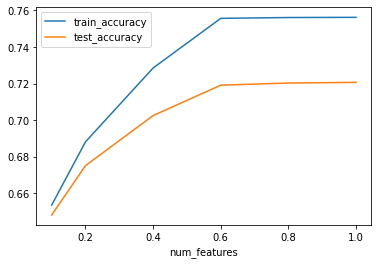

In [164]:
'''
Feature set selection for logistic model
'''
log_feature_num_df = feature_num(X, y, LogisticRegression(C=1.0))
log_feature_num_df.plot(x="num_features", y=["train_accuracy", "test_accuracy"])

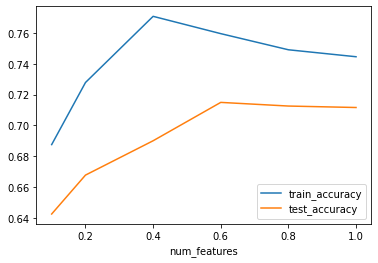

In [167]:
'''
Feature set selection for SVM model
'''
svm_feature_num_df = feature_num(X, y, svm.SVC())
svm_feature_num_df.plot(x="num_features", y=["train_accuracy", "test_accuracy"])

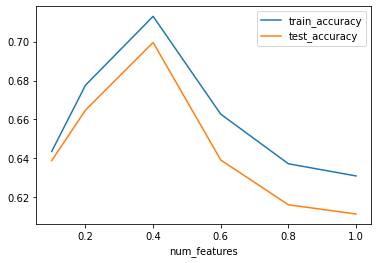

In [166]:
'''
Feature set selection for Multinomial Naive Bayes
'''
MNB_feature_num_df = feature_num(X, y, MultinomialNB())
MNB_feature_num_df.plot(x="num_features", y=["train_accuracy", "test_accuracy"])

In [0]:
def hyperparameter(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
        # ......
        clf = LogisticRegression(C=param).fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

def hyperparameterSVM(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
        # ......
        clf = svm.SVC(C=param).fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

def hyperparameterNB(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
        # ......
        clf = MultinomialNB(alpha=param).fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


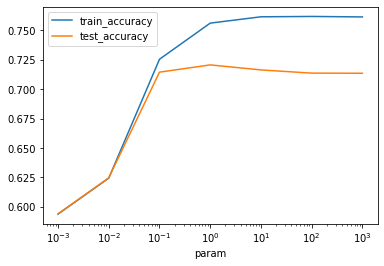

In [169]:
'''
Hyper parameter tuning for logistic model
'''
param_df = hyperparameter(X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

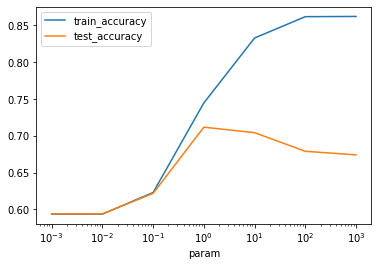

In [43]:
'''
Hyper parameter tuning for SVM model
'''
param_df = hyperparameterSVM(X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

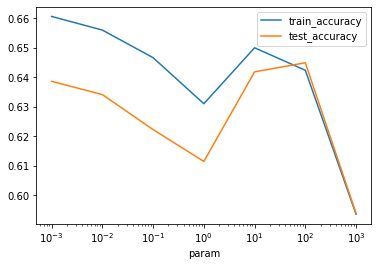

In [44]:
'''
Hyper parameter tuning for Multinomial Naive Bayes model
'''
param_df = hyperparameterNB(X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

## Part 4: Sentiment Analysis

In [0]:
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

def getHistogram(finaldf, measure, title):
    if measure=='both':
        x = [finaldf['ratingScore'].values/5]
        y = [finaldf['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(finaldf[measure].values)
        plt.title(title)
        plt.xlabel(measure)
        plt.ylabel("Frequency")
        fig = plt.gcf()

### a.

100%|██████████| 4775/4775 [00:00<00:00, 6281.27it/s]


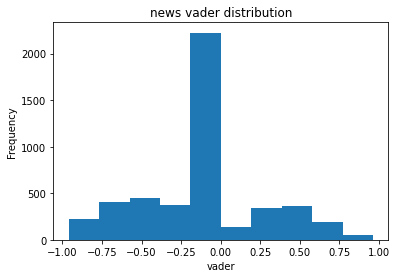

In [66]:
'''
Vader distribution for news
'''
news_titles = data[data['subreddit']=='news']['title'].values
news_titlesDF = evalSentences(news_titles, to_df=True, columns=['title','vader'])
getHistogram(news_titlesDF, 'vader', 'news vader distribution')

100%|██████████| 5897/5897 [00:00<00:00, 6925.17it/s]


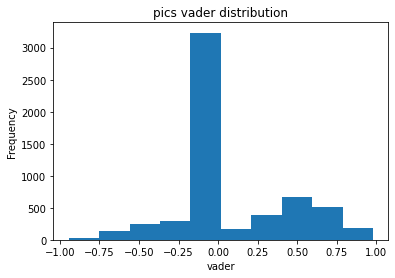

In [67]:
'''
Vader distribution for pics
'''
pics_titles = data[data['subreddit']=='pics']['title'].values
pics_titlesDF = evalSentences(pics_titles, to_df=True, columns=['title','vader'])
getHistogram(pics_titlesDF, 'vader', 'pics vader distribution')

100%|██████████| 20000/20000 [00:02<00:00, 7179.40it/s]


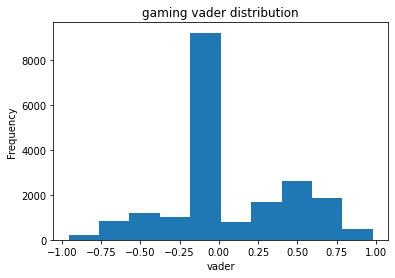

In [70]:
'''
Vader distribution for gaming
'''
gaming_titles = data[data['subreddit']=='gaming']['title'].values
gaming_titlesDF = evalSentences(gaming_titles, to_df=True, columns=['title','vader'])
getHistogram(gaming_titlesDF, 'vader', 'gaming vader distribution')

100%|██████████| 4939/4939 [00:00<00:00, 8927.15it/s]


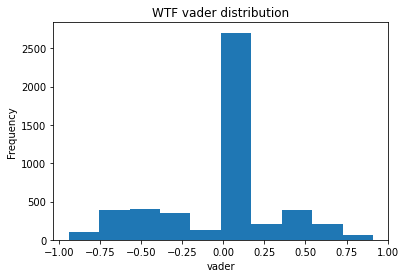

In [71]:
'''
Vader distribution for WTF
'''
WTF_titles = data[data['subreddit']=='WTF']['title'].values
WTF_titlesDF = evalSentences(WTF_titles, to_df=True, columns=['title','vader'])
getHistogram(WTF_titlesDF, 'vader', 'WTF vader distribution')

### b. 

From the vader distributions for all subreddits, I find that mot topics vader score is around 0.0. The vader score distributions varie slightly depeding on the different topics.

### c. I choose 0.25 to be threshold.

In [0]:
'''
Add labels
'''
news_titlesDF['label'] = np.where(news_titlesDF['vader'] >= 0.25, 'pos', 'neg')
pics_titlesDF['label'] = np.where(pics_titlesDF['vader'] >= 0.25, 'pos', 'neg')
gaming_titlesDF['label'] = np.where(gaming_titlesDF['vader'] >= 0.25, 'pos', 'neg')
WTF_titlesDF['label'] = np.where(WTF_titlesDF['vader'] >= 0.25, 'pos', 'neg')

### d.

I show the most common 50 words for each subreddit. The results are evaluated visually.
The nouns show in the top 50 words for each subreddits are closely related to the topic for both positive and negative lists. In the positive words, there are many adjactives or verbs with strong sentiment, such like, best and good but it is not the case for the negative words except for the WTF subreddit. In the negative words for WTF subreddit, you can see strong negative words, like WTF, NSFW and fuck, probably beacuse of sepecialty of the this subreddit name.

In [0]:
def getTopK(df, k, label_value, label_column='label', operation=operator.eq, value_column='title'):
    lemmatizer = WordNetLemmatizer() 
    stop = set(stopwords.words('english'))
    stop.add("...")
    stop.add("n't")
    stop.add("'ve")
    stop.add("'re")
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([lemmatizer.lemmatize(word_set)
                          for word_set
                          in nltk.word_tokenize(review)
                          if lemmatizer.lemmatize(word_set).lower() not in stop and len(lemmatizer.lemmatize(word_set)) > 2])
    topk = counter.most_common(k)
    return topk


#### (i)

In [98]:
'''
Top 50 most common word for news positive
'''
getTopK(df=news_titlesDF, k=50, label_value='pos')

[('Best', 60),
 ('News', 35),
 ('Trump', 31),
 ('2019', 30),
 ('New', 24),
 ('say', 24),
 ('Get', 21),
 ('Market', 21),
 ('2018', 19),
 ('best', 18),
 ('help', 18),
 ('Benefits', 17),
 ('amp', 16),
 ('year', 16),
 ('free', 15),
 ('Court', 15),
 ('Help', 14),
 ('Service', 14),
 ('India', 13),
 ('Care', 13),
 ('Police', 13),
 ('shutdown', 13),
 ('Party', 12),
 ('Security', 12),
 ('first', 12),
 ('Tips', 12),
 ('people', 12),
 ('Card', 11),
 ('Love', 11),
 ('Top', 11),
 ('Services', 11),
 ('Russian', 11),
 ('Free', 11),
 ('http', 11),
 ('House', 11),
 ('top', 11),
 ('step', 11),
 ('Man', 11),
 ('police', 11),
 ('paper', 11),
 ('Good', 10),
 ('Online', 10),
 ('Health', 10),
 ('get', 10),
 ('Supreme', 10),
 ('money', 9),
 ('True', 9),
 ('Research', 9),
 ('Special', 9),
 ('security', 9)]

In [99]:
'''
Top 50 most common word for pics positive
'''
getTopK(df=pics_titlesDF, k=50, label_value='pos')

[('like', 205),
 ('photo', 133),
 ('friend', 129),
 ('best', 117),
 ('look', 115),
 ('year', 111),
 ('picture', 104),
 ('took', 97),
 ('day', 78),
 ('one', 77),
 ('love', 76),
 ('2018', 72),
 ('New', 66),
 ('pic', 63),
 ('today', 59),
 ('favorite', 58),
 ('beautiful', 56),
 ('good', 51),
 ('guy', 51),
 ('get', 49),
 ('made', 49),
 ('Happy', 47),
 ('little', 44),
 ('new', 43),
 ('got', 43),
 ('first', 41),
 ('make', 40),
 ('great', 38),
 ('night', 37),
 ('really', 35),
 ('would', 34),
 ('found', 34),
 ('last', 33),
 ('know', 32),
 ('share', 32),
 ('think', 32),
 ('painted', 32),
 ('Year', 31),
 ('shot', 31),
 ('time', 30),
 ('amazing', 30),
 ('old', 30),
 ('ago', 29),
 ('thought', 29),
 ('work', 29),
 ('Reddit', 27),
 ('wife', 27),
 ('taken', 26),
 ('painting', 26),
 ('One', 25)]

In [100]:
'''
Top 50 most common word for gaming positive
'''
getTopK(df=gaming_titlesDF, k=50, label_value='pos')

[('game', 2129),
 ('play', 669),
 ('like', 605),
 ('good', 457),
 ('best', 372),
 ('gaming', 338),
 ('help', 313),
 ('one', 260),
 ('time', 260),
 ('year', 255),
 ('friend', 252),
 ('would', 243),
 ('get', 231),
 ('love', 216),
 ('favorite', 214),
 ('played', 213),
 ('new', 208),
 ('first', 189),
 ('playing', 183),
 ('got', 179),
 ('video', 179),
 ('Best', 174),
 ('made', 166),
 ('ever', 161),
 ('Help', 158),
 ('know', 157),
 ('old', 153),
 ('need', 150),
 ('better', 145),
 ('guy', 144),
 ('think', 137),
 ('make', 135),
 ('really', 132),
 ('Xbox', 128),
 ('still', 126),
 ('PS4', 125),
 ('look', 122),
 ('great', 118),
 ('console', 110),
 ('day', 108),
 ('people', 107),
 ('Nintendo', 107),
 ('anyone', 104),
 ('want', 103),
 ('Need', 98),
 ('fun', 98),
 ('way', 92),
 ('today', 92),
 ('Super', 92),
 ('Game', 91)]

In [101]:
'''
Top 50 most common word for WTF positive
'''
getTopK(df=WTF_titlesDF, k=50, label_value='pos')

[('like', 79),
 ('friend', 45),
 ('hand', 26),
 ('look', 26),
 ('good', 20),
 ('get', 17),
 ('time', 17),
 ('one', 17),
 ('found', 16),
 ('love', 16),
 ('dog', 15),
 ('better', 15),
 ('year', 14),
 ('say', 13),
 ('left', 13),
 ('sure', 13),
 ('help', 13),
 ('think', 13),
 ('WTF', 13),
 ('got', 12),
 ('party', 12),
 ('nice', 12),
 ('Well', 12),
 ('NSFW', 11),
 ('alive', 11),
 ('take', 11),
 ('life', 11),
 ('made', 11),
 ('man', 11),
 ('thing', 10),
 ('way', 10),
 ('Man', 10),
 ('best', 10),
 ('Best', 10),
 ('know', 10),
 ('video', 10),
 ('right', 10),
 ('new', 9),
 ('someone', 9),
 ('cool', 9),
 ('people', 9),
 ('God', 9),
 ('school', 9),
 ('2019', 8),
 ('see', 8),
 ('interesting', 8),
 ('guy', 8),
 ('ago', 8),
 ('fit', 8),
 ('kid', 8)]

(ii)

In [102]:
'''
Top 50 most common word for news negative
'''
getTopK(df=news_titlesDF, k=50, label_value='neg')

[('Trump', 209),
 ('http', 167),
 ('rokambola', 118),
 ('2019', 114),
 ('say', 110),
 ('New', 89),
 ('shutdown', 84),
 ('News', 81),
 ('amp', 80),
 ('year', 74),
 ('government', 73),
 ('woman', 72),
 ('man', 72),
 ('U.S.', 68),
 ('Man', 66),
 ('arrested', 60),
 ('police', 55),
 ('dead', 52),
 ('killed', 51),
 ('Police', 49),
 ('new', 49),
 ('American', 49),
 ('China', 49),
 ('student', 47),
 ('Post', 47),
 ('India', 44),
 ('para', 44),
 ('charged', 43),
 ('state', 41),
 ('Market', 41),
 ('Online', 41),
 ('attack', 40),
 ('news', 40),
 ('child', 39),
 ('shooting', 39),
 ('House', 39),
 ('State', 39),
 ('death', 38),
 ('report', 37),
 ('wall', 37),
 ('people', 36),
 ('Edited', 36),
 ('Woman', 35),
 ('officer', 35),
 ('accused', 34),
 ('que', 34),
 ('border', 34),
 ('found', 33),
 ('million', 33),
 ('Florida', 33)]

In [103]:
'''
Top 50 most common word for pics negative
'''
getTopK(df=pics_titlesDF, k=50, label_value='neg')

[('year', 174),
 ('picture', 131),
 ('photo', 102),
 ('took', 100),
 ('painted', 100),
 ('today', 95),
 ('one', 91),
 ('guy', 88),
 ('first', 85),
 ('day', 79),
 ('time', 79),
 ('made', 76),
 ('got', 69),
 ('old', 68),
 ('last', 66),
 ('New', 65),
 ('dog', 64),
 ('new', 62),
 ('get', 61),
 ('cat', 59),
 ('found', 55),
 ('painting', 54),
 ('see', 53),
 ('morning', 52),
 ('night', 52),
 ('look', 50),
 ('know', 50),
 ('pic', 47),
 ('like', 47),
 ('work', 46),
 ('back', 46),
 ('way', 44),
 ('ago', 44),
 ('taken', 41),
 ('snow', 40),
 ('mom', 40),
 ('little', 39),
 ('make', 39),
 ('take', 39),
 ('car', 38),
 ('shot', 37),
 ('wife', 37),
 ('house', 37),
 ('right', 36),
 ('tree', 36),
 ('Found', 36),
 ('think', 35),
 ('people', 35),
 ('2018', 34),
 ('home', 34)]

In [104]:
'''
Top 50 most common word for gaming negative
'''
getTopK(df=gaming_titlesDF, k=50, label_value='neg')

[('game', 2286),
 ('gaming', 436),
 ('get', 363),
 ('one', 349),
 ('year', 316),
 ('time', 310),
 ('new', 297),
 ('got', 280),
 ('think', 267),
 ('know', 233),
 ('Game', 228),
 ('made', 228),
 ('playing', 227),
 ('Games', 217),
 ('PS4', 216),
 ('Xbox', 215),
 ('video', 213),
 ('old', 208),
 ('first', 189),
 ('need', 186),
 ('Resident', 186),
 ('Nintendo', 182),
 ('like', 178),
 ('Evil', 176),
 ('Gaming', 171),
 ('people', 170),
 ('guy', 167),
 ('play', 166),
 ('Dead', 165),
 ('day', 164),
 ('would', 157),
 ('anyone', 156),
 ('2019', 153),
 ('buy', 152),
 ('still', 150),
 ('New', 150),
 ('Anthem', 150),
 ('make', 149),
 ('ever', 147),
 ('Switch', 146),
 ('Fallout', 145),
 ('want', 144),
 ('Red', 144),
 ('Anyone', 138),
 ('else', 138),
 ('console', 138),
 ('see', 134),
 ('back', 134),
 ('Looking', 130),
 ('found', 125)]

In [105]:
'''
Top 50 most common word for WTF negative
'''
getTopK(df=WTF_titlesDF, k=50, label_value='neg')

[('WTF', 156),
 ('NSFW', 100),
 ('found', 89),
 ('Man', 80),
 ('get', 73),
 ('dog', 68),
 ('know', 64),
 ('guy', 63),
 ('Found', 63),
 ('year', 62),
 ('back', 55),
 ('thing', 54),
 ('one', 53),
 ('think', 50),
 ('day', 49),
 ('car', 48),
 ('wtf', 47),
 ('man', 47),
 ('woman', 46),
 ('time', 46),
 ('fuck', 45),
 ('people', 42),
 ('even', 42),
 ('got', 42),
 ('kid', 41),
 ('want', 39),
 ('doe', 38),
 ('today', 38),
 ('video', 38),
 ('going', 37),
 ('make', 37),
 ('work', 37),
 ('baby', 34),
 ('Wtf', 34),
 ('new', 33),
 ('say', 33),
 ('old', 32),
 ('school', 32),
 ('weird', 32),
 ('home', 31),
 ('hour', 31),
 ('like', 30),
 ('dead', 29),
 ('look', 29),
 ('see', 29),
 ('way', 28),
 ('inside', 28),
 ('2019', 27),
 ('face', 27),
 ('picture', 27)]